In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mdtraj as md
from soursop.sstrajectory import SSTrajectory

In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.linewidth'] = 1.0
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [236]:
#Import trajectory
t=SSTrajectory('../../kdd/prod4/kdd_0-500ns_s4.dcd', '../../kdd/infile/kdd_150mMNaCl.psf')
protein = t.proteinTrajectoryList[0]
print('Number of residues within protein: {}'.format(protein.n_residues))


Number of residues within protein: 13


In [237]:
start_residue=0
end_residue = protein.n_residues - 1
asphericity = protein.get_asphericity(start_residue, end_residue)
radius_of_gyration=protein.get_radius_of_gyration(start_residue, end_residue)

STATUS: On frame 500 of 12500 [computing gyration tensor]
STATUS: On frame 1000 of 12500 [computing gyration tensor]
STATUS: On frame 1500 of 12500 [computing gyration tensor]
STATUS: On frame 2000 of 12500 [computing gyration tensor]
STATUS: On frame 2500 of 12500 [computing gyration tensor]
STATUS: On frame 3000 of 12500 [computing gyration tensor]
STATUS: On frame 3500 of 12500 [computing gyration tensor]
STATUS: On frame 4000 of 12500 [computing gyration tensor]
STATUS: On frame 4500 of 12500 [computing gyration tensor]
STATUS: On frame 5000 of 12500 [computing gyration tensor]
STATUS: On frame 5500 of 12500 [computing gyration tensor]
STATUS: On frame 6000 of 12500 [computing gyration tensor]
STATUS: On frame 6500 of 12500 [computing gyration tensor]
STATUS: On frame 7000 of 12500 [computing gyration tensor]
STATUS: On frame 7500 of 12500 [computing gyration tensor]
STATUS: On frame 8000 of 12500 [computing gyration tensor]
STATUS: On frame 8500 of 12500 [computing gyration tensor

In [238]:
def plot_asphericity_vs_Rg(radius_of_gyration, asphericity, t, num_bins=100, max_Rg=50, max_asphericity=1.0):
    fig=plt.figure(figsize=(8,6), dpi=720)
    ax=fig.add_subplot(111)
    title=t[:-4]
    ax.set_title(title, weight='bold', fontsize=20,loc='left')
    ax.set_xlabel('$R_g$', weight='bold', fontsize=20)
    ax.set_ylabel('Asphericity ($\delta$)', weight='bold', fontsize=20)
    xedges=np.linspace(0, max_Rg, num_bins+1)
    yedges=np.linspace(0,max_asphericity, num_bins+1)
    Rg=radius_of_gyration
    asp=asphericity
    _hist, _xedges, _yedges, im = ax.hist2d(Rg, asp, bins=(xedges, yedges), cmap='jet')
    colorbar=fig.colorbar(im)
    colorbar.set_label('Counts', rotation=90, labelpad=30, weight='bold', fontsize=20)
    for t in colorbar.ax.get_yticklabels():
        t.set_fontsize(18)
        t.set_fontweight('bold')
    plt.xticks(weight='bold', fontsize=18)
    plt.yticks(weight='bold', fontsize=18)
    plt.tight_layout()
    plt.savefig('RgVsAsp_nt17-r3.png', format='png')
    plt.show()
    
    plt.close()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.colors import LinearSegmentedColormap
def surface_asphericity_vs_Rg(radius_of_gyration, asphericity, t, num_bins=100, max_Rg=50, max_asphericity=1.0):
    

    Rg=radius_of_gyration
    asp=asphericity

    colors = ['white', 'lightgray','tan','red']  # White, Green, Red

    # Create the colormap using LinearSegmentedColormap
    jn = LinearSegmentedColormap.from_list('white_green_red', colors, N=256)
    # Generate some sample data for x and y
    x = Rg
    y = asp

    # Define bin edges and count occurrences (frequency) in each bin
    x_bins = np.linspace(min(x), max(x), 10)
    y_bins = np.linspace(min(y), max(y), 10)
    hist, x_edges, y_edges = np.histogram2d(x, y, bins=[x_bins, y_bins])

    # Create grid and compute frequency
    x_centers = (x_edges[:-1] + x_edges[1:]) / 2
    y_centers = (y_edges[:-1] + y_edges[1:]) / 2
    X, Y = np.meshgrid(x_centers, y_centers)
    Z = hist.T  # Transpose to align dimensions
    # Interpolation to smooth the surface
    x_smooth = np.linspace(x_centers.min(), x_centers.max(), 500)
    y_smooth = np.linspace(y_centers.min(), y_centers.max(), 500)
    X_smooth, Y_smooth = np.meshgrid(x_smooth, y_smooth)
    Z_smooth = griddata((X.flatten(), Y.flatten()), Z.flatten(), (X_smooth, Y_smooth), method='cubic')

    x0, y0 = 0, 0  # Center of valley at origin (shift if needed)
    sigma_x, sigma_y = 15, 15  # Controls the width of the valley

    # Generate Gaussian centered valley shape
    valley = np.exp(-((X_smooth - x0)**2 / (2 * sigma_x**2) + (Y_smooth - y0)**2 / (2 * sigma_y**2)))
    Z_valley = Z_smooth * (1 - valley)  # Apply valley effect to Z

    # Plot the 3D valley surface
    fig = plt.figure(figsize=(8,6), dpi=300)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X_smooth, Y_smooth, Z_valley, cmap=jn)

    title=t[:-4]
    #ax.set_xlim([0,x_centers.max()*2])
    #ax.set_ylim([0, y_centers.max()])
    #ax.set_zlim([40, Z_valley.max()])
    #ax.set_title(title, weight='bold', fontsize=10,loc='left')
    #ax.set_xlabel('$R_g$', weight='bold', fontsize=10)
    #ax.set_ylabel('Asphericity ($\delta$)', weight='bold', fontsize=10)
    #ax.set_zlabel('Frequency')
    ax.text(x=int(x_centers.max())/1.5, y=y_centers.max(), z=5, s='$R_g$', color='black', fontsize=12, ha='center', va='center')  # Adjust x and y positions
    ax.text(x=x_centers.min(), y=y_centers.max()/2, z=-25, s='Asphericity', color='black', fontsize=12, ha='center', va='center')  # Adjust x and y positions

    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Hide the x-axis line
    ax.yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Hide the y-axis line
    ax.zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))  # Hide the z-axis line

    # Turn off ticks and tick labels
    ax.set_xticks([])  # Turn off x ticks
    ax.set_yticks([])  # Turn off y ticks
    ax.set_zticks([])  # Turn off z ticks
    ax.view_init(elev=20, azim=180)

    ax.grid(False)
    #plt.colorbar(surf, label='Frequency')
    plt.savefig(f'{t}', format='png', dpi=720)
    plt.show()

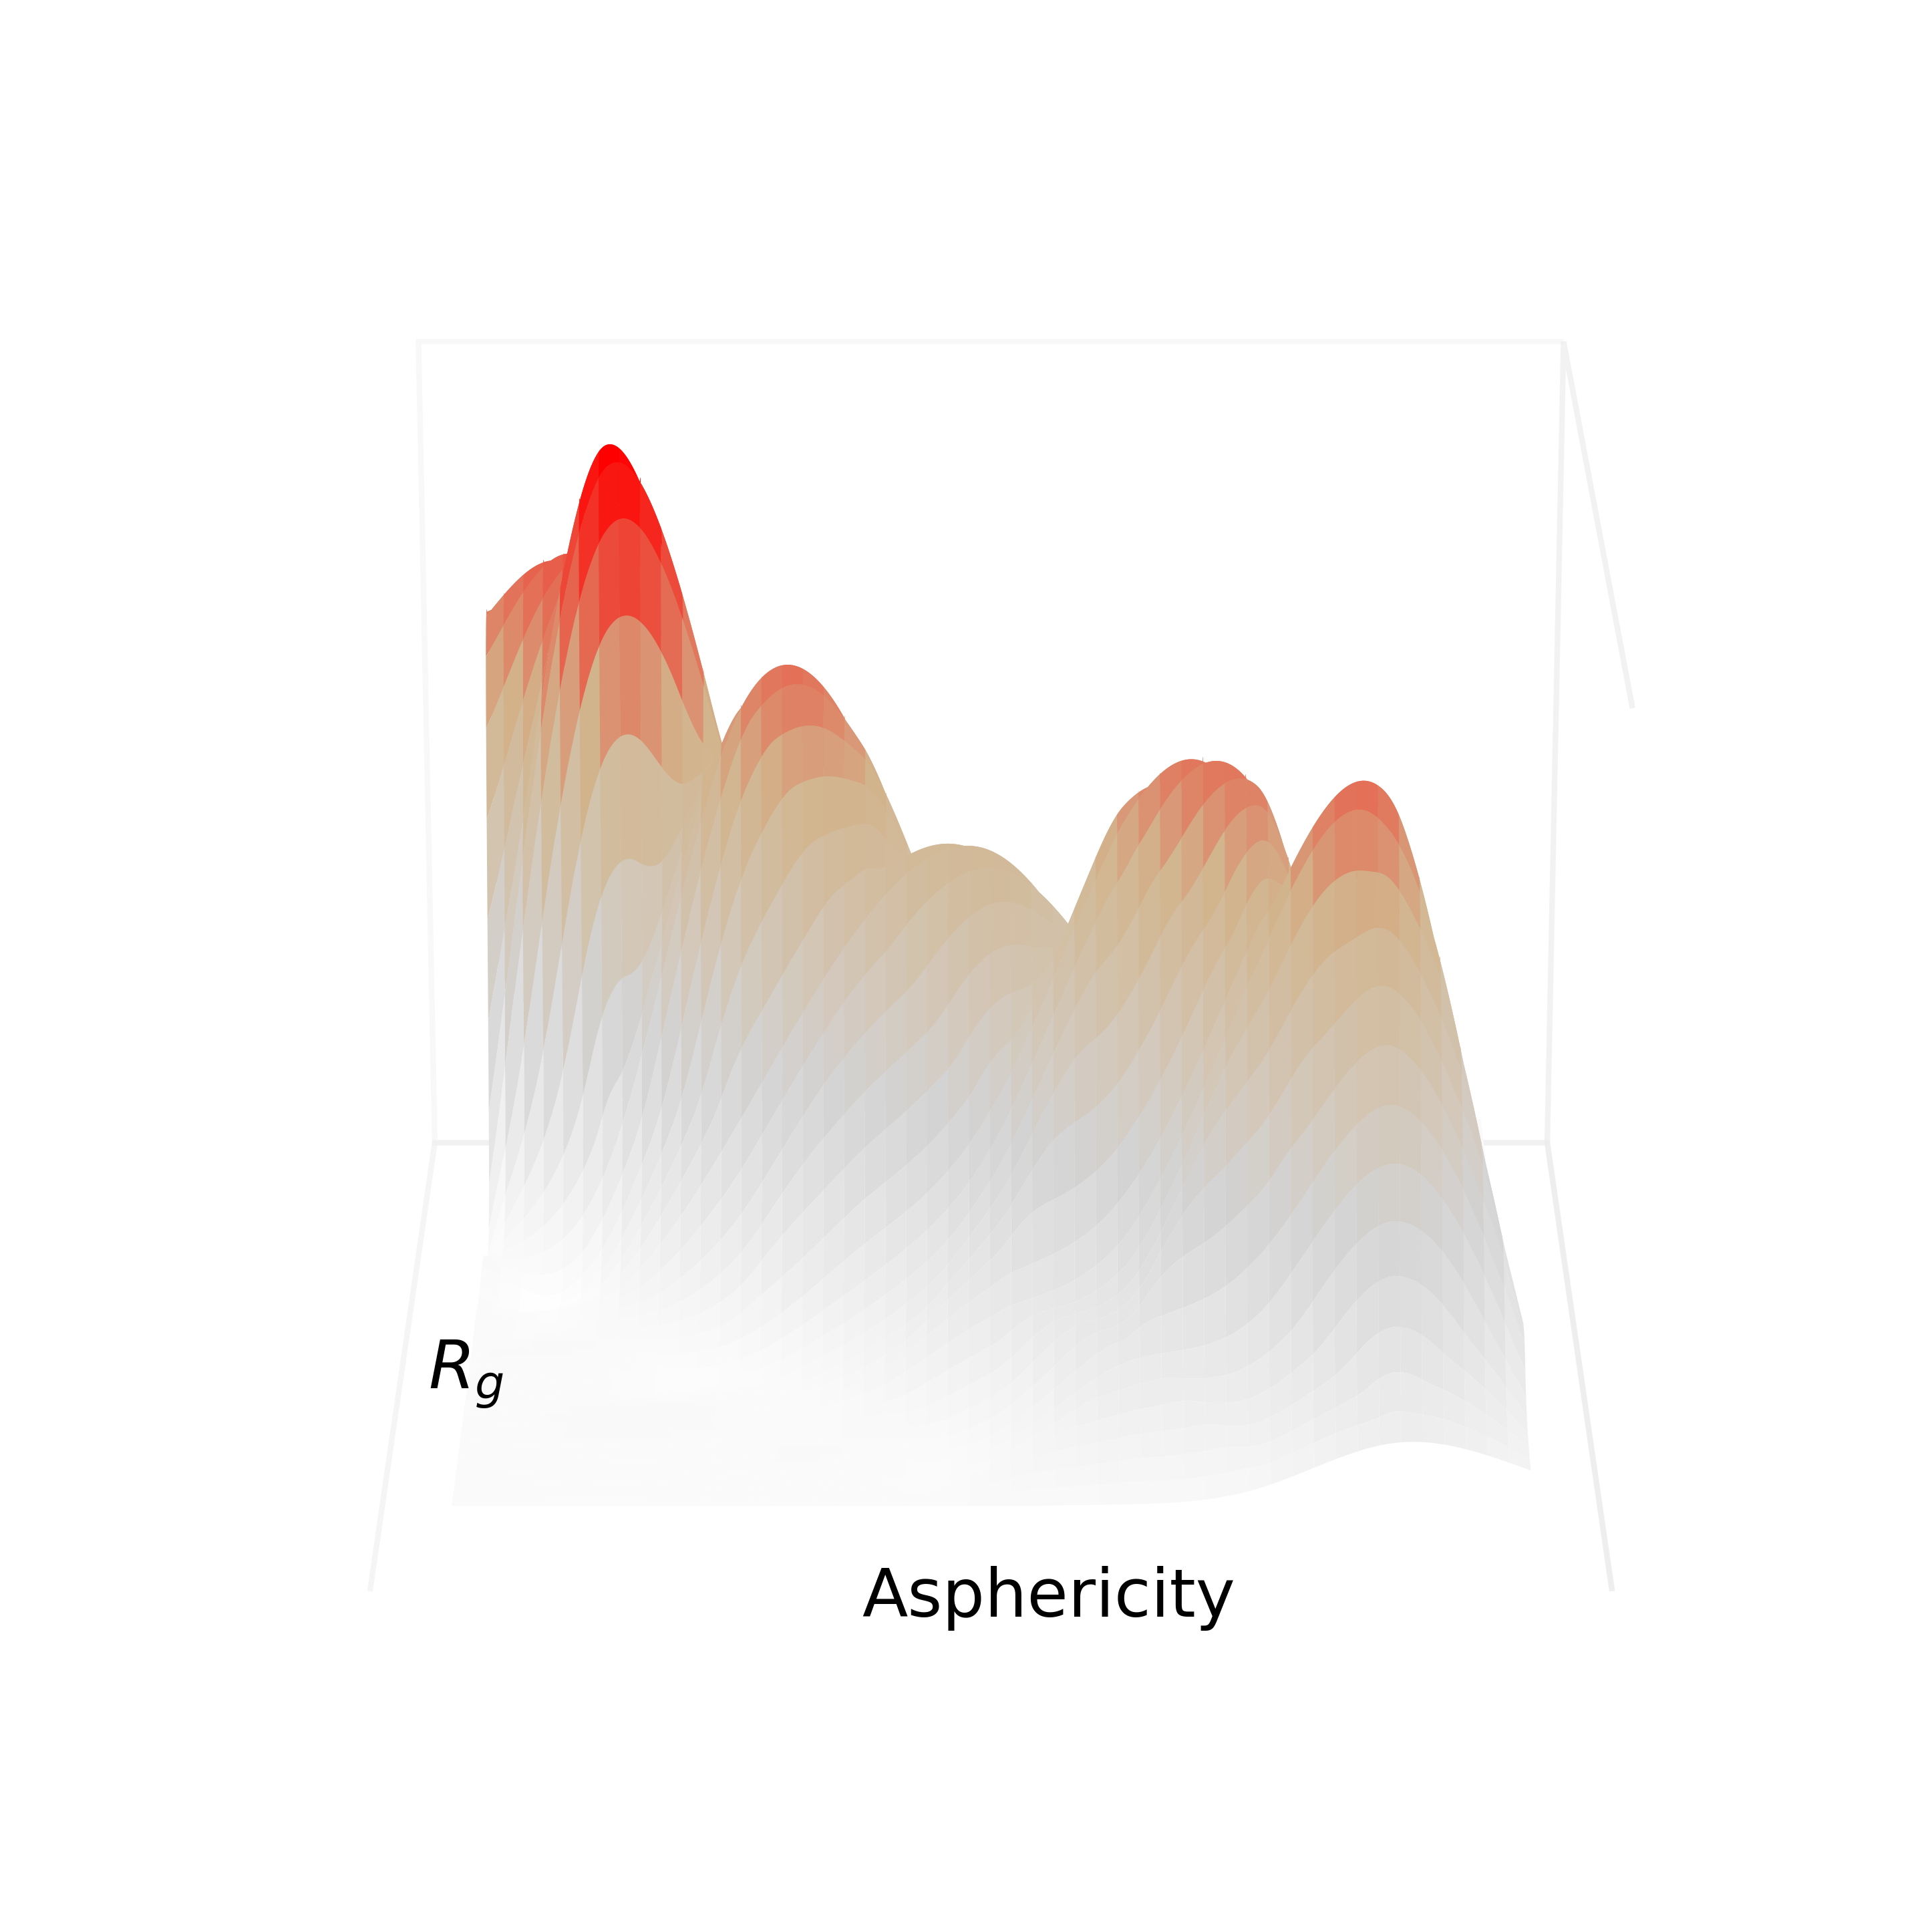

In [239]:
t='kdd-r4_surface.png'

surface_asphericity_vs_Rg(radius_of_gyration, asphericity,t, num_bins=100, max_Rg=50, max_asphericity=1.0)

In [131]:
import nglview

ModuleNotFoundError: No module named 'nglview'

In [125]:
protein_frames_contact_map=protein.get_contact_map()

In [143]:
def plot_contact_map(contact_map ,t):
    fig=plt.figure(figsize=(8,6), dpi=300)
    ax=fig.add_subplot(111)
    title=t[:-7]
    ax.set_title(title, weight='bold', fontsize=18,loc='left')
    ax.set_xlabel('Residue $i$', weight='bold', fontsize=18)
    ax.set_ylabel('Residue $j$', weight='bold', fontsize=18)
    im=ax.imshow(protein_frames_contact_map[0],cmap='cool')
    colorbar=fig.colorbar(im)
    colorbar.set_label('Frequency', rotation=90, labelpad=30, weight='bold', fontsize=18)
    for t in colorbar.ax.get_yticklabels():
        t.set_fontsize(18)
        t.set_fontweight('bold')
    plt.xticks(weight='bold', fontsize=18)
    plt.yticks(weight='bold', fontsize=18)
    plt.tight_layout()
    plt.savefig('nt17-r3-CM.png', format='png')
    plt.show()

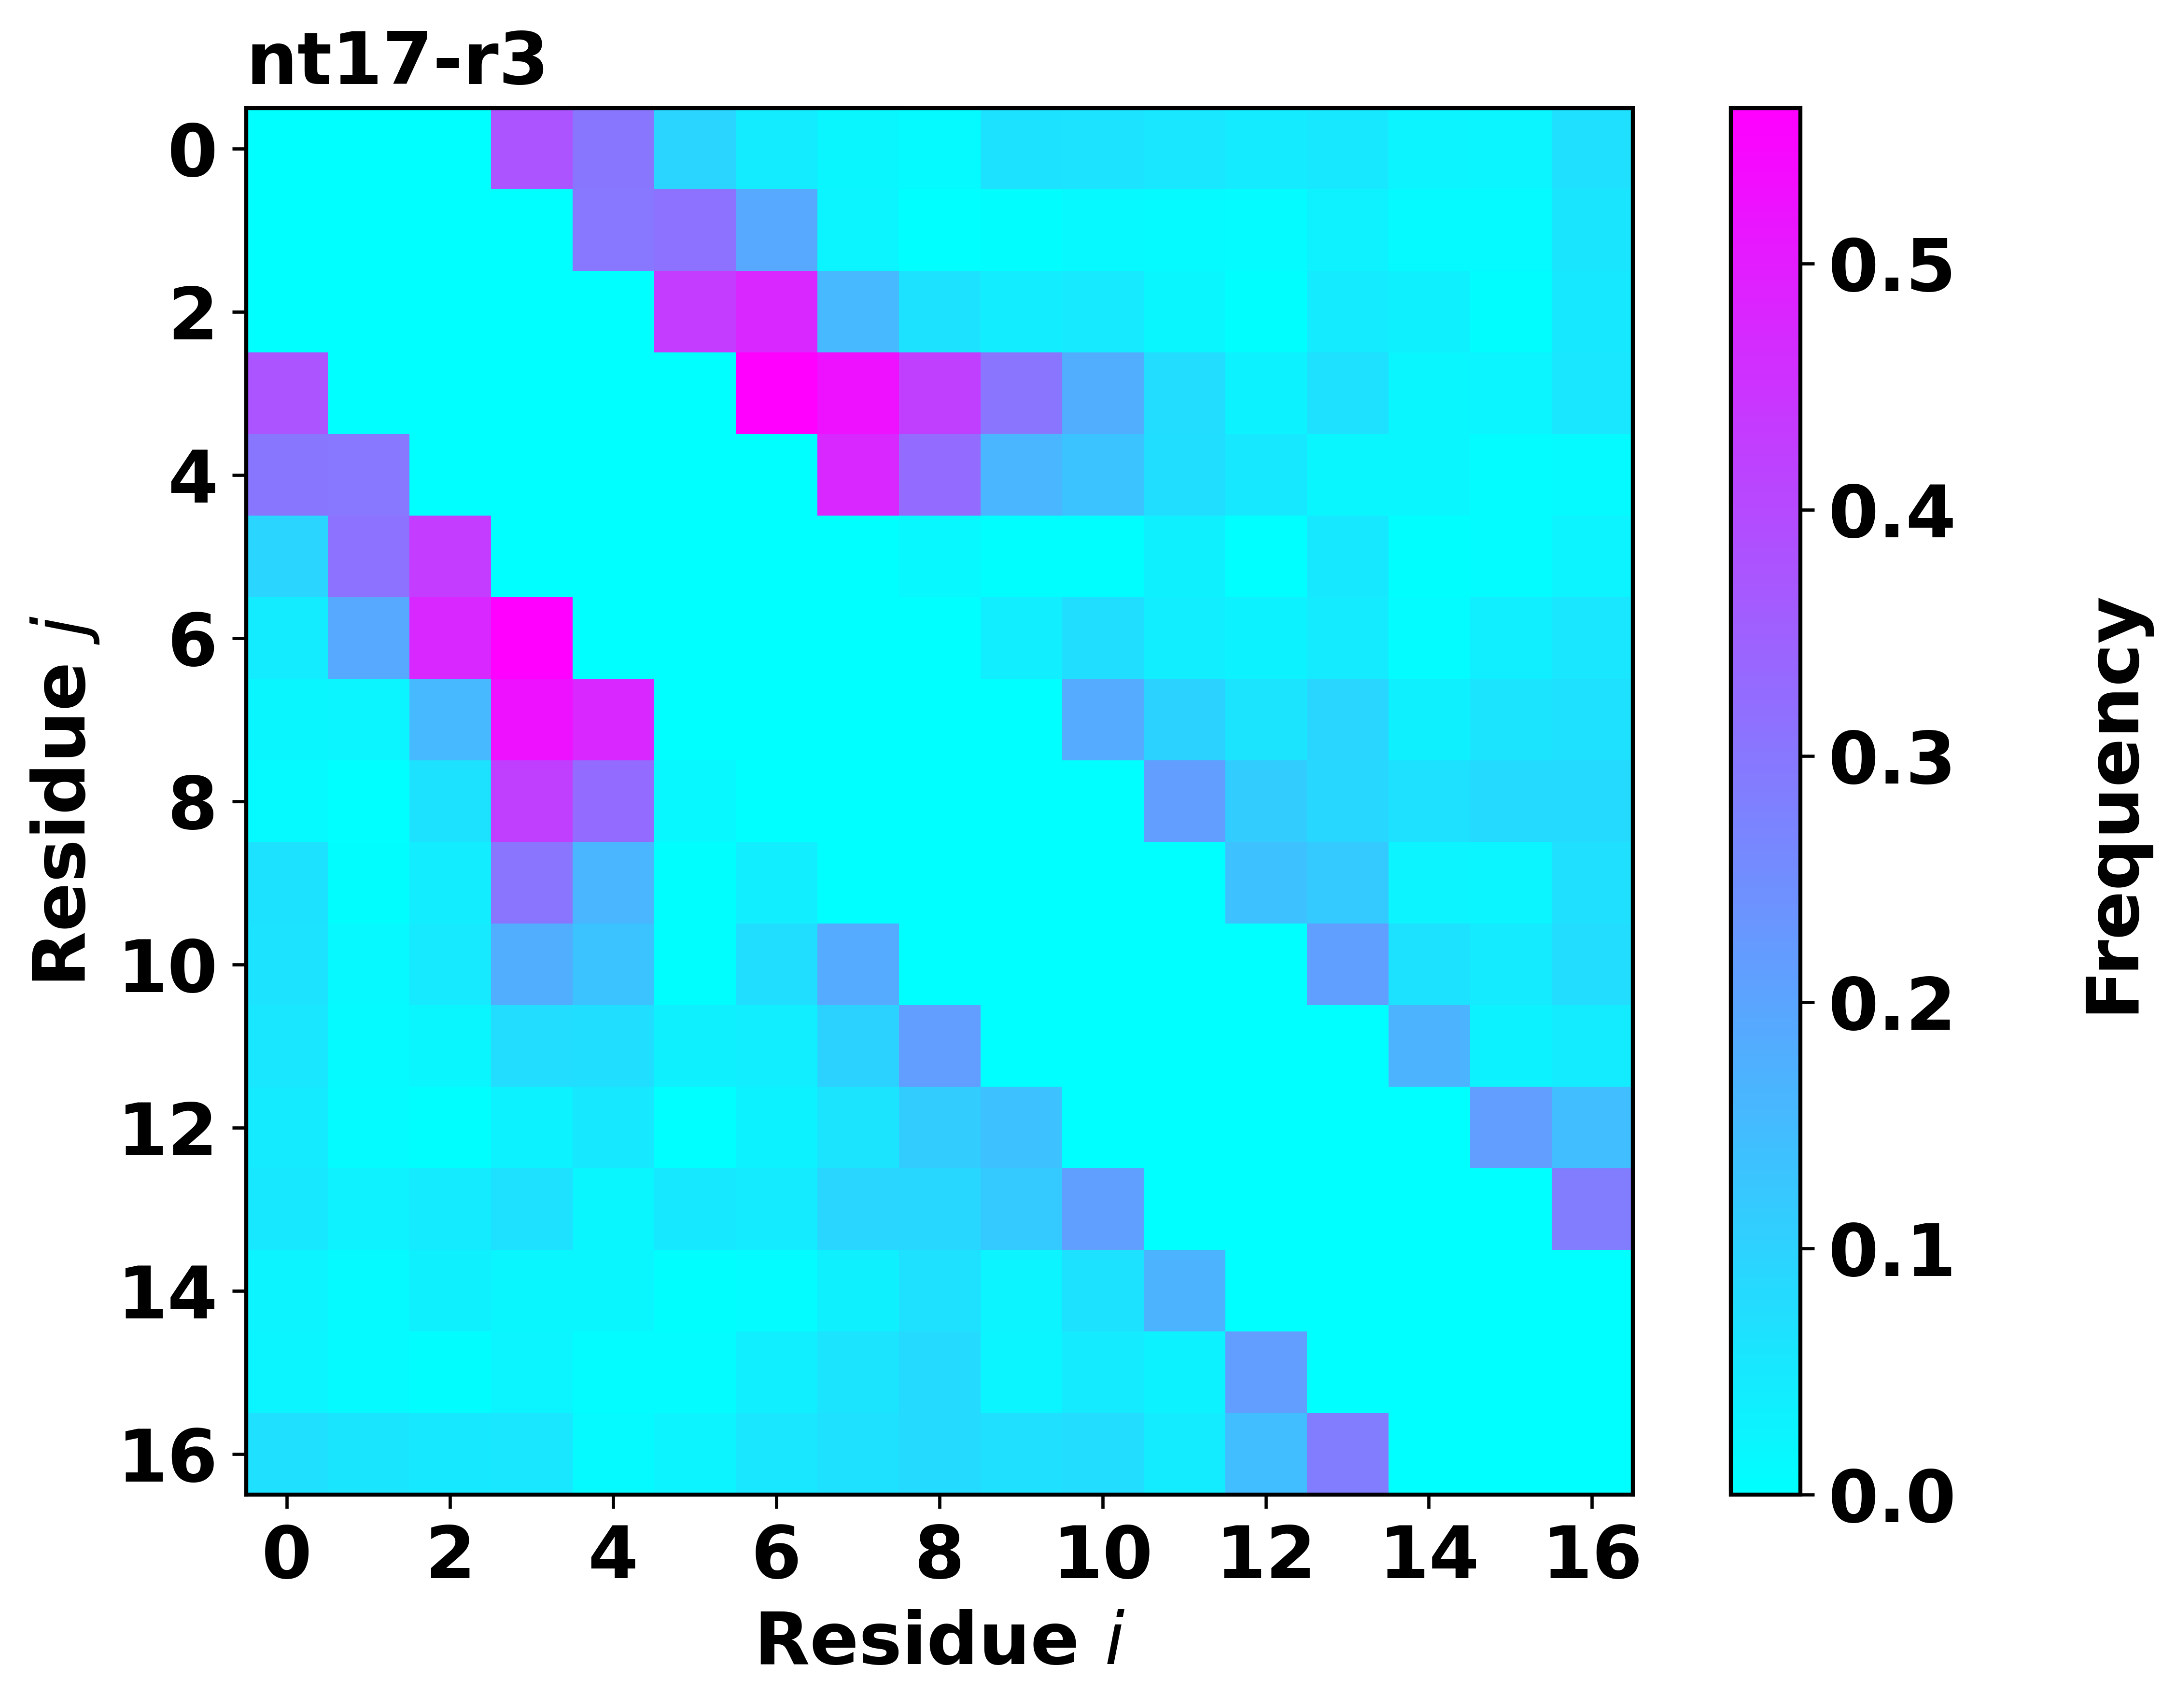

In [144]:
t='nt17-r3-CM.png'
plot_contact_map(protein_frames_contact_map[0],t)